# Face and Eye Detection using OpenCV

## Detect face and eyes from the image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

Faces found:  1


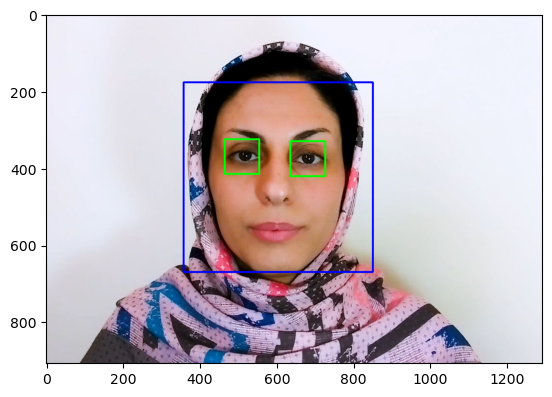

In [3]:
image = cv2.imread("test_img.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces_rects = haar_cascade_face.detectMultiScale(gray_image, scaleFactor = 1.1, minNeighbors = 5)
print('Faces found: ', len(faces_rects))

for (x,y,w,h) in faces_rects:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 4)
        
        
    roi_gray_image = gray_image[y:y+h, x:x+w]
    roi_image = image[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray_image, scaleFactor = 1.1, minNeighbors = 15)

    for (e_x, e_y, e_w, e_h) in eyes:
        cv2.rectangle(roi_image, (e_x, e_y), (e_x+e_w, e_y+e_h), (0, 255, 0), 3)
        
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Detect face and eyes in real-time mode using a webcam

In [4]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [9]:
cap = cv2.VideoCapture(1)

In [10]:
if (cap.isOpened() == False):
    print("Error opening the video file")
else:
    fps = cap.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_width = int(cap.get(3))
    print('Frames width : ', frame_width)
    frame_height = int(cap.get(4))
    print('Frames height : ', frame_height)
    frame_count = cap.get(7)
    print('Frame count : ', frame_count)

Frames per second :  29.97002997002997 FPS
Frames width :  640
Frames height :  480
Frame count :  -1.0


In [11]:
fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
output = cv2.VideoWriter('output.avi', fourcc, 15, (frame_width,frame_height))

In [12]:
while True:
    ret, frame = cap.read()
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces_rects = haar_cascade_face.detectMultiScale(gray_frame, scaleFactor = 1.1, minNeighbors = 5);
        
        for (x,y,w,h) in faces_rects:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 4)
            roi_gray_frame = gray_frame[y:y+h, x:x+w]
            roi_frame = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray_frame, scaleFactor = 1.1, minNeighbors = 10)
            for (e_x, e_y, e_w, e_h) in eyes:
                cv2.rectangle(roi_frame, (e_x, e_y), (e_x+e_w, e_y+e_h), (0, 255, 0), 3)

        output.write(frame)
        cv2.imshow('Frame', frame)

        key = cv2.waitKey(25)
        if key == ord('q'):
            break
    else:
        break


cap.release()
output.release()
cv2.destroyAllWindows()